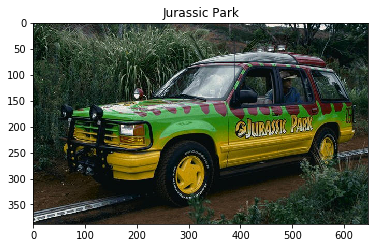

In [9]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('./jurassic-park-tour-jeep.jpg')
img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.title('Jurassic Park')
plt.imshow(img,interpolation='none')

<module 'matplotlib.pyplot' from '/Users/xzy/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

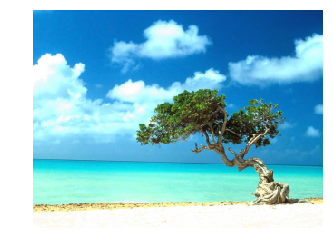

In [34]:
def read(path, switch_channels=True):
    
    # cv2.imread() function read an image, the function need the path 
    # even if the image path is wrong, it won’t throw any error, but print img will give you None
    # return a list of pic pix in BGR color space
    image = cv2.imread(path)
    
    if switch_channels:
        # change color space, like BGR <-> Gray, BGR <-> HSV etc. there are more than 150 color-space in OpenCV
        # BGR stands for Red, Green, Blue, RGB stands for Red, Green, Blue
        # Why? BGR was popular among camera  manufacturers and software providers, historical reasons, live with it. 
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # return a list of array of pic pix in RGB color space
    return image


def resize(image, new_x_dim):
    # image.shape, shape is properties, it returns a tuple of number of rows, columns and channels (if image is color)
    # image.shape, return (768, 1024, 3), image.shape[1] return columns 1024
    # ratio is 0.3125, came from 320/ 1024
    ratio = new_x_dim / image.shape[1]
    # dim is (320, 240), 240 came from 768 * 0.3125
    # depende new_x_dim, jo større tal jo større resultat
    dim = (new_x_dim, int(image.shape[0] * ratio))
    
    # perform the actual resizing of the image and show it
    # resize(src, dst, dst.size(), 0, 0, interpolation);
    # src = image, dst = output, dst.size() = output size
    # INTER_AREA - resampling using pixel area relation. It may be a preferred method for image decimation, as it gives moire’-free results. But when the image is zoomed, it is similar to the INTER_NEAREST method.
    resized_image = cv2.resize(image, dim, interpolation=cv2.INTER_AREA)
    return resized_image


def create_plot(image, title=''):
    plt.imshow(image, interpolation='none')
    plt.title(title)
    plt.axis('off')
    return plt


# image_path = './jurassic-park-tour-jeep.jpg'
image_path = './mare-08.jpg'

img = read(image_path)
img_small = resize(img, 320)
create_plot(img_small)

<module 'matplotlib.pyplot' from '/Users/xzy/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

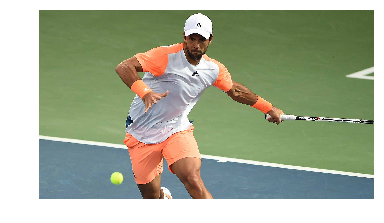

In [47]:
image_path = './verdasco-dubai-2017-thursday.jpg'

img = read(image_path)
create_plot(img)

<module 'matplotlib.pyplot' from '/Users/xzy/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

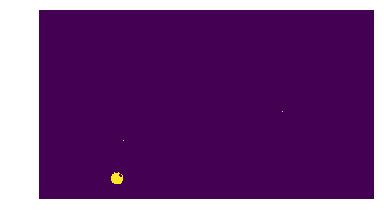

In [64]:
def create_ball_mask(image):

    # Color values in HSV
    green_lower = (20, 100, 180)
    green_upper = (60, 255, 255)
    hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    
    mask = cv2.inRange(hsv, green_lower, green_upper)
    mask = cv2.dilate(mask, None, iterations=2)
    mask = cv2.erode(mask, None, iterations=2)
    
    return mask

create_plot(create_ball_mask(img))